<a href="https://colab.research.google.com/github/nish2306/EODashboard_Hackathorn_Files/blob/main/EOdashboard_Visual_tool_upgrade_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
import os
import glob
os.chdir("/content/drive/MyDrive/Visualization_EOdashboard")

In [6]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [7]:
all_filenames

['New Delhi_2021-06-28_IN01-N2.csv',
 'Dhaka_2021-06-28_BD01-N2.csv',
 'Shanghai_2021-06-28_CN02-N2.csv',
 'Mumbai_2021-06-28_IN02-N2.csv',
 'Beijing_2021-06-28_CN01-N2.csv',
 'New York_2021-06-28_US01-N2.csv',
 'Tokyo_2021-06-29_JP01-N2.csv']

In [8]:
def city_name(list_):
  city = []
  for i in range(len(list_)):
    x = all_filenames[i]
    val = x.split('_',maxsplit=1)[0]
    city.append(val)
  return city
    


In [9]:
cities = city_name(all_filenames)

In [10]:
frames = []
for i in range(len(all_filenames)):
  path = '/content/drive/MyDrive/Visualization_EOdashboard/'+ all_filenames[i]
  df = pd.read_csv(path)
  df['City'] = cities[i]
  frames.append(df)


In [16]:
df = pd.concat(frames,ignore_index=True)

In [17]:
df

,time,aoi,measurement,indicatorValue,referenceTime,dataProvider,eoSensor,colorCode,inputData,City
0,2016-03-01T00:00:00.000Z,"LatLng(28.6448, 77.216721)",0.91,Normal,Invalid DateTime,JAXA,GOSAT,BLUE,NaN,New Delhi
1,2016-04-01T00:00:00.000Z,"LatLng(28.6448, 77.216721)",6.49,Normal,Invalid DateTime,JAXA,GOSAT,BLUE,NaN,New Delhi
2,2017-01-01T00:00:00.000Z,"LatLng(28.6448, 77.216721)",2.33,Normal,Invalid DateTime,JAXA,GOSAT,BLUE,NaN,New Delhi
3,2017-02-01T00:00:00.000Z,"LatLng(28.6448, 77.216721)",7.09,Normal,Invalid DateTime,JAXA,GOSAT,BLUE,NaN,New Delhi
4,2017-03-01T00:00:00.000Z,"LatLng(28.6448, 77.216721)",1.67,Normal,Invalid DateTime,JAXA,GOSAT,BLUE,NaN,New Delhi
...,...,...,...,...,...,...,...,...,...,...
116,2019-04-01T00:00:00.000Z,"LatLng(35.61, 139.78)",4.43,Normal,Invalid DateTime,JAXA,Apr 2016-2019 average value GOSAT,BLUE,GOSAT_XCO2,Tokyo
117,2020-01-01T00:00:00.000Z,"LatLng(35.61, 139.78)",3.52,Low,Invalid DateTime,JAXA,January value GOSAT,GREEN,GOSAT_XCO2,Tokyo
118,2020-02-01T00:00:00.000Z,"LatLng(35.61, 139.78)",4.11,Low,Invalid DateTime,JAXA,February value GOSAT,GREEN,GOSAT_XCO2,Tokyo
119,2020-03-01T00:00:00.000Z,"LatLng(35.61, 139.78)",3.58,Low,Invalid DateTime,JAXA,March value GOSAT,GREEN,GOSAT_XCO2,Tokyo


In [135]:
# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [56]:
# path = '/content/drive/MyDrive/Visualization_EOdashboard/combined_csv.csv'

In [92]:
# df = pd.read_csv(path)

In [18]:
df = df.drop(['referenceTime','inputData','eoSensor'],axis = 1)

In [19]:
df.head()

,time,aoi,measurement,indicatorValue,dataProvider,colorCode,City
0,2016-03-01T00:00:00.000Z,"LatLng(28.6448, 77.216721)",0.91,Normal,JAXA,BLUE,New Delhi
1,2016-04-01T00:00:00.000Z,"LatLng(28.6448, 77.216721)",6.49,Normal,JAXA,BLUE,New Delhi
2,2017-01-01T00:00:00.000Z,"LatLng(28.6448, 77.216721)",2.33,Normal,JAXA,BLUE,New Delhi
3,2017-02-01T00:00:00.000Z,"LatLng(28.6448, 77.216721)",7.09,Normal,JAXA,BLUE,New Delhi
4,2017-03-01T00:00:00.000Z,"LatLng(28.6448, 77.216721)",1.67,Normal,JAXA,BLUE,New Delhi


In [20]:
import re

In [21]:
def time_change(col):
  x = col 
  x = re.sub('T00:00:00.000Z', '', x)
  return x


In [22]:
df['Time'] = df['time'].apply(time_change)

In [23]:
def latlong_change(col):
  x = col 
  x = re.sub('LatLng', '', x)
  x = x.replace('(', '')
  x = x.replace(')', '')

  # x = re.sub('1)', '', x)
  return x


In [24]:
df['lat_long'] = df['aoi'].apply(latlong_change)

In [25]:
df = df.drop(['time','aoi'],axis=1)

In [26]:
df

,measurement,indicatorValue,dataProvider,colorCode,City,Time,lat_long
0,0.91,Normal,JAXA,BLUE,New Delhi,2016-03-01,"28.6448, 77.216721"
1,6.49,Normal,JAXA,BLUE,New Delhi,2016-04-01,"28.6448, 77.216721"
2,2.33,Normal,JAXA,BLUE,New Delhi,2017-01-01,"28.6448, 77.216721"
3,7.09,Normal,JAXA,BLUE,New Delhi,2017-02-01,"28.6448, 77.216721"
4,1.67,Normal,JAXA,BLUE,New Delhi,2017-03-01,"28.6448, 77.216721"
...,...,...,...,...,...,...,...
116,4.43,Normal,JAXA,BLUE,Tokyo,2019-04-01,"35.61, 139.78"
117,3.52,Low,JAXA,GREEN,Tokyo,2020-01-01,"35.61, 139.78"
118,4.11,Low,JAXA,GREEN,Tokyo,2020-02-01,"35.61, 139.78"
119,3.58,Low,JAXA,GREEN,Tokyo,2020-03-01,"35.61, 139.78"


In [126]:
df['colorCode'].unique()

array(['BLUE', 'GREEN'], dtype=object)

In [27]:
import datetime

In [28]:
from datetime import datetime

In [29]:
def convert_month(col):
  x = col
  date_time_obj = datetime.strptime(x, '%Y-%m-%d')
  return date_time_obj.strftime('%B')


In [30]:
df['month'] = df['Time'].apply(convert_month)

In [31]:
def convert_year(col):
  x = col
  date_time_obj = datetime.strptime(x, '%Y-%m-%d')
  return '20' + date_time_obj.strftime('%y')

In [32]:
df['Year'] = df['Time'].apply(convert_year)

In [33]:
df

,measurement,indicatorValue,dataProvider,colorCode,City,Time,lat_long,month,Year
0,0.91,Normal,JAXA,BLUE,New Delhi,2016-03-01,"28.6448, 77.216721",March,2016
1,6.49,Normal,JAXA,BLUE,New Delhi,2016-04-01,"28.6448, 77.216721",April,2016
2,2.33,Normal,JAXA,BLUE,New Delhi,2017-01-01,"28.6448, 77.216721",January,2017
3,7.09,Normal,JAXA,BLUE,New Delhi,2017-02-01,"28.6448, 77.216721",February,2017
4,1.67,Normal,JAXA,BLUE,New Delhi,2017-03-01,"28.6448, 77.216721",March,2017
...,...,...,...,...,...,...,...,...,...
116,4.43,Normal,JAXA,BLUE,Tokyo,2019-04-01,"35.61, 139.78",April,2019
117,3.52,Low,JAXA,GREEN,Tokyo,2020-01-01,"35.61, 139.78",January,2020
118,4.11,Low,JAXA,GREEN,Tokyo,2020-02-01,"35.61, 139.78",February,2020
119,3.58,Low,JAXA,GREEN,Tokyo,2020-03-01,"35.61, 139.78",March,2020


In [34]:
df = df.drop(['Time'],axis=1)

In [76]:
pip install geopy


In [121]:
from geopy.geocoders import Nominatim

def get_city(col):
  lat_long = col
  geolocator = Nominatim(user_agent="geoapiExercises")
  location = geolocator.reverse(lat_long,language = 'en')
  address = location.raw['address']
  print(address)
  city = address.get('town')
  # print(city)
  return city


In [35]:
df.to_csv('/content/drive/MyDrive/Resultant_DataFile.csv')

In [68]:
import seaborn as sn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


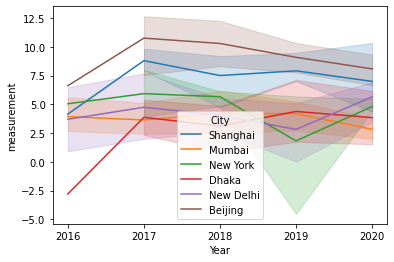

In [168]:
sn.lineplot(df['Year'],df['measurement'],hue=df['City'])